In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics

In [2]:
df_twitter = pd.read_excel("tbl_twitter_v2.xlsx")
df_twitter.head(5)

,User,Date,Ano,Likes,Retweets,Quotes,Replies,Total_Engajamento,Tweet,text_sem_stopwords,tokenized,text_string,Qtd_Caracteres,Politica,Saude,Educacao,Seguranca,Meio_Ambiente,Economia,Categoria_Predominante
0,fatooufake,202208,2022,4,0,0,2,8,"candidato à reeleição pelo pl participou, nest...","candidato reeleicao pl participou, nesta quart...","['candidato', 'reeleicao', 'pl', 'participou',...",candidato reeleicao participou nesta quarta-fe...,141,4,0,0,0,0,0,POLITICA
1,fatooufake,202208,2022,7,0,0,1,9,candidato do psdb ao governo do df participou ...,candidato psdb governo df participou serie ent...,"['candidato', 'psdb', 'governo', 'df', 'partic...",candidato psdb governo participou serie entrev...,124,3,0,0,0,0,0,POLITICA
2,fatooufake,202208,2022,7,1,0,1,10,a entrevista foi transmitida ao vivo pela rádi...,entrevista transmitida vivo radio sites redes ...,"['entrevista', 'transmitida', 'vivo', 'radio',...",entrevista transmitida vivo radio sites redes ...,108,1,0,0,0,0,0,POLITICA
3,fatooufake,202208,2022,7,0,0,1,9,"frases foram ditas em redes sociais, no horári...","frases ditas redes sociais, horario eleitoral ...","['frases', 'ditas', 'redes', 'sociais', ',', '...",frases ditas redes sociais horario eleitoral e...,112,2,0,0,0,0,0,POLITICA
4,fatooufake,202208,2022,6,1,0,1,9,candidato ao governo do rio pelo pdt participo...,"candidato governo rio pdt participou, nesta se...","['candidato', 'governo', 'rio', 'pdt', 'partic...",candidato governo rio pdt participou nesta seg...,148,3,0,0,0,0,0,POLITICA


In [43]:
df_aux = pd.read_csv('plotagem_boxplot_normalizado.csv')

In [44]:
df_aux.head(10)

,Unnamed: 0,Total_Engajamento,Ano_2020,Ano_2022,Qtd_Caracteres,User_estadaoverifica,User_fatooufake,User_uolconfere,Politica,Saude,Educacao,Seguranca,Meio_Ambiente,Economia,bc_engajamento
0,1,8.0,0,1,4.948760,0,1,0,1.386294,0.0,0.0,0.0,0.0,0.0,2.395125
1,2,9.0,0,1,4.820282,0,1,0,1.098612,0.0,0.0,0.0,0.0,0.0,2.551615
2,3,10.0,0,1,4.682131,0,1,0,0.000000,0.0,0.0,0.0,0.0,0.0,2.693690
3,4,9.0,0,1,4.718499,0,1,0,0.693147,0.0,0.0,0.0,0.0,0.0,2.551615
4,5,9.0,0,1,4.997212,0,1,0,1.098612,0.0,0.0,0.0,0.0,0.0,2.551615
5,6,5.0,0,1,4.644391,0,1,0,1.098612,0.0,0.0,0.0,0.0,0.0,1.794488
6,7,144.0,0,1,4.430817,0,1,0,0.000000,0.0,0.0,0.0,0.0,0.0,7.040496
7,8,8.0,0,1,5.170484,0,1,0,1.609438,0.0,0.0,0.0,0.0,0.0,2.395125
8,9,4.0,0,1,4.624973,0,1,0,0.000000,0.0,0.0,0.0,0.0,0.0,1.522193
9,10,7.0,0,1,4.624973,0,1,0,0.000000,0.0,0.0,0.0,0.0,0.0,2.220648


<AxesSubplot:title={'center':'Box-Plot dos Valores de Engajamento - Transf. Box-Cox'}, xlabel='bc_engajamento'>

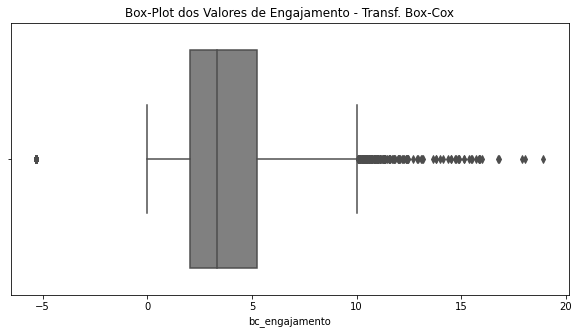

In [46]:
# Box-Plot
plt.figure(figsize=(10,5))
plt.title('Box-Plot dos Valores de Engajamento - Transf. Box-Cox', fontsize=12)
sns.boxplot(x='bc_engajamento', data=df_aux,color='grey') # Filtrando os outliers
# Mediana < 20
# Uma distribuição normal apresentaria um box-plot com a caixa próxima do centro da linha horizontal, que não é o caso abaixo. 
# Este está assimétrico, com calda à direita. Do lado direito, também é possível observar um grande volume de outliers. A partir dessa análise, 
# a impressão que temos é de que não é uma distribuição normal.  

<AxesSubplot:title={'center':'Box-Plot dos Valores de Engajamento Sem Outliers'}, xlabel='Total_Engajamento'>

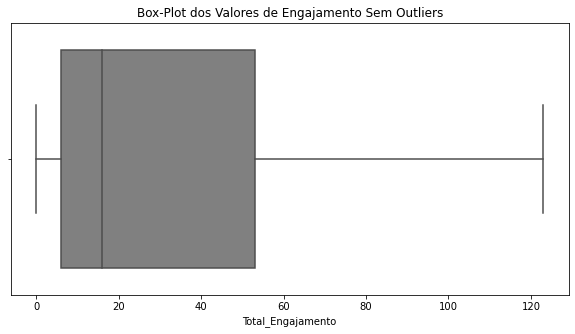

In [41]:
# Box-Plot
plt.figure(figsize=(10,5))
plt.title('Box-Plot dos Valores de Engajamento Sem Outliers', fontsize=12)
sns.boxplot(x='Total_Engajamento', data=df_twitter,color='grey', showfliers=False) # Filtrando os outliers
# Mediana < 20
# Uma distribuição normal apresentaria um box-plot com a caixa próxima do centro da linha horizontal, que não é o caso abaixo. 
# Este está assimétrico, com calda à direita. Do lado direito, também é possível observar um grande volume de outliers. A partir dessa análise, 
# a impressão que temos é de que não é uma distribuição normal.  

<AxesSubplot:title={'center':'Box-Plot dos Valores de Engajamento'}, xlabel='Total_Engajamento'>

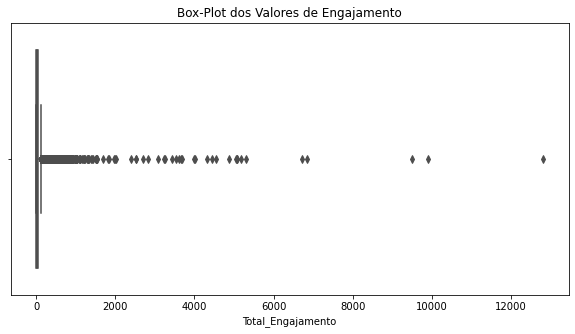

In [42]:
plt.figure(figsize=(10,5))
plt.title('Box-Plot dos Valores de Engajamento', fontsize=12)
sns.boxplot(x='Total_Engajamento', data=df_twitter,color='grey') # Considerando os outliers

<AxesSubplot:title={'center':'Distribuição dos Valores de Engajamento'}, xlabel='Total_Engajamento', ylabel='Count'>

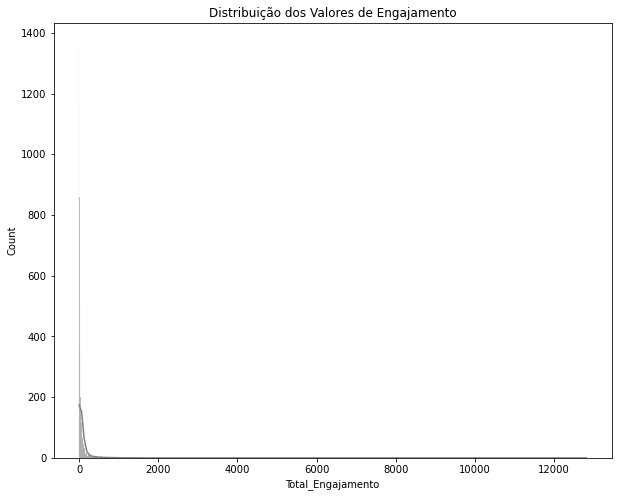

In [5]:
# Histograma
plt.figure(figsize=(10,8))
plt.title('Distribuição dos Valores de Engajamento', fontsize=12)
sns.histplot(x='Total_Engajamento', data=df_twitter, kde=True, color='grey') 

In [6]:
df_twitter['Total_Engajamento'].median(), df_twitter['Total_Engajamento'].mean() # Média afetada pelos outliers > média desloca-se à direira da mediana. Isso reforça que não temos uma distribuição normal. 

(16.0, 81.26368855902534)

Text(0.5, 1.0, 'Normal QQ Plot')

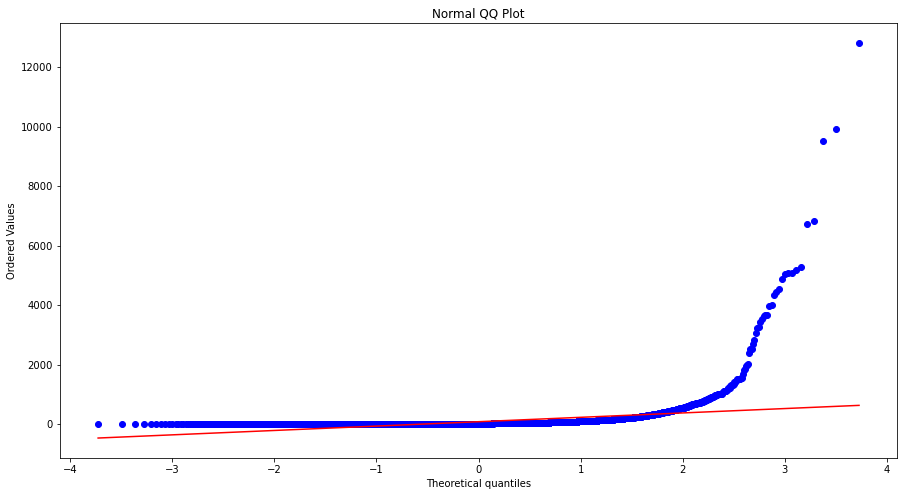

In [7]:
import scipy.stats as stats
plt.figure(figsize=(15,8))
stats.probplot(df_twitter['Total_Engajamento'], dist='norm', plot=plt)
plt.title('Normal QQ Plot', fontsize=12)

In [8]:
from statsmodels.stats.diagnostic import lilliefors as lillie

In [36]:
# H0 : Normal com p-value > 0.05 e H1 : Não Normal com p-value <= 0.05
# Shapiro Wilk & K-S >> Rejeito H0, apontando para uma distribuição não normal
print("Shapiro-Wilk: ", stats.shapiro(df_twitter['Total_Engajamento']))
print("Kolmogorov-Smirnov: ", lillie(df_twitter['Total_Engajamento'],dist='norm'))

Shapiro-Wilk:  ShapiroResult(statistic=0.16335946321487427, pvalue=0.0)
Kolmogorov-Smirnov:  (0.41200789477745414, 0.0009999999999998899)


c:\Users\clara\OneDrive\anaconda3\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [ ]:
# print("Anderson-Darling: ", stats.anderson(df_twitter['Total_Engajamento'],'norm'))

<AxesSubplot:title={'center':'Heatmap - Correlação'}>

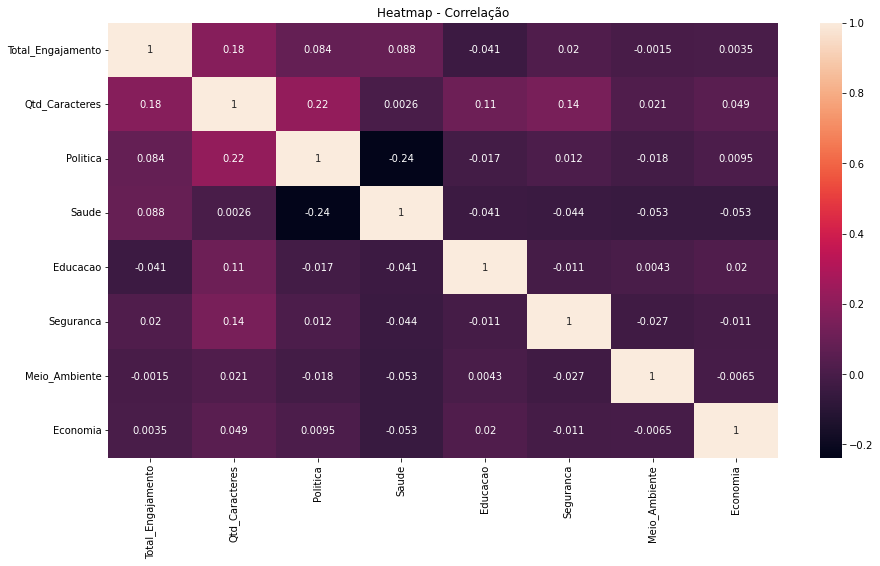

In [37]:
# Análise de Correlação >> Correlação baixa das variáveis com "Total_Engajamento"
cols = ['Total_Engajamento', 'Qtd_Caracteres', 'Politica', 'Saude', 'Educacao', 'Seguranca', 'Meio_Ambiente', 'Economia']
correlacao = df_twitter[cols].corr(method='spearman') # Usando esse método dado que temos uma distribuição não normal

plt.figure(figsize=(15,8))
plt.title('Heatmap - Correlação', fontsize=12)
sns.heatmap(correlacao, annot=True)

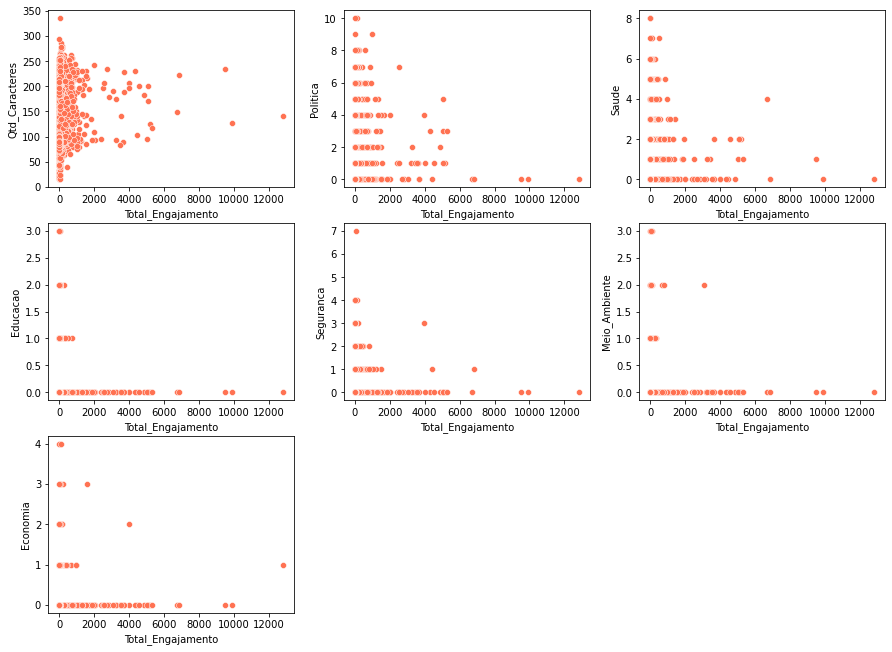

In [11]:
cols = ['Qtd_Caracteres', 'Politica', 'Saude', 'Educacao', 'Seguranca', 'Meio_Ambiente', 'Economia']
plt.figure(figsize=(15,15))

for k in range(len(cols)):
    plt.subplot(4,3,k+1)
    sns.scatterplot(x='Total_Engajamento',y=cols[k],data=df_twitter,color='#ff7252')

plt.ylabel(cols[k],fontsize=10)
plt.xlabel('Total_Engajamento',fontsize=10)
plt.show()

In [12]:
df_twitter_aux = pd.get_dummies(data=df_twitter, columns=['Ano', 'User'])

In [13]:
df_twitter_aux.head(5)

,Date,Likes,Retweets,Quotes,Replies,Total_Engajamento,Tweet,text_sem_stopwords,tokenized,text_string,...,Meio_Ambiente,Economia,Categoria_Predominante,Ano_2020,Ano_2021,Ano_2022,User_agencialupa,User_estadaoverifica,User_fatooufake,User_uolconfere
0,202208,4,0,0,2,8,"candidato à reeleição pelo pl participou, nest...","candidato reeleicao pl participou, nesta quart...","['candidato', 'reeleicao', 'pl', 'participou',...",candidato reeleicao participou nesta quarta-fe...,...,0,0,POLITICA,0,0,1,0,0,1,0
1,202208,7,0,0,1,9,candidato do psdb ao governo do df participou ...,candidato psdb governo df participou serie ent...,"['candidato', 'psdb', 'governo', 'df', 'partic...",candidato psdb governo participou serie entrev...,...,0,0,POLITICA,0,0,1,0,0,1,0
2,202208,7,1,0,1,10,a entrevista foi transmitida ao vivo pela rádi...,entrevista transmitida vivo radio sites redes ...,"['entrevista', 'transmitida', 'vivo', 'radio',...",entrevista transmitida vivo radio sites redes ...,...,0,0,POLITICA,0,0,1,0,0,1,0
3,202208,7,0,0,1,9,"frases foram ditas em redes sociais, no horári...","frases ditas redes sociais, horario eleitoral ...","['frases', 'ditas', 'redes', 'sociais', ',', '...",frases ditas redes sociais horario eleitoral e...,...,0,0,POLITICA,0,0,1,0,0,1,0
4,202208,6,1,0,1,9,candidato ao governo do rio pelo pdt participo...,"candidato governo rio pdt participou, nesta se...","['candidato', 'governo', 'rio', 'pdt', 'partic...",candidato governo rio pdt participou nesta seg...,...,0,0,POLITICA,0,0,1,0,0,1,0


In [14]:
cols = ['Ano_2020', 'Ano_2021',	'Ano_2022', 'User_agencialupa',	'User_estadaoverifica',	
        'User_fatooufake', 'User_uolconfere', 'Qtd_Caracteres', 'Politica', 'Saude',
        'Educacao', 'Seguranca', 'Meio_Ambiente', 'Economia']

X = pd.DataFrame(df_twitter_aux,columns=cols)
y = df_twitter_aux['Total_Engajamento']

In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled_data = scaler.fit_transform(X)

X_standard_df = pd.DataFrame(X_scaled_data, columns =['Ano_2020', 'Ano_2021', 'Ano_2022', 'User_agencialupa', 'User_estadaoverifica',	
        'User_fatooufake', 'User_uolconfere', 'Qtd_Caracteres', 'Politica', 'Saude',
        'Educacao', 'Seguranca', 'Meio_Ambiente', 'Economia'])

In [16]:
X_standard_df.head(5)

,Ano_2020,Ano_2021,Ano_2022,User_agencialupa,User_estadaoverifica,User_fatooufake,User_uolconfere,Qtd_Caracteres,Politica,Saude,Educacao,Seguranca,Meio_Ambiente,Economia
0,-0.337442,-0.941625,1.156495,-0.901608,-0.394574,2.423418,-0.610309,-0.135355,2.224379,-0.521431,-0.133848,-0.27724,-0.097212,-0.133724
1,-0.337442,-0.941625,1.156495,-0.901608,-0.394574,2.423418,-0.610309,-0.461654,1.492924,-0.521431,-0.133848,-0.27724,-0.097212,-0.133724
2,-0.337442,-0.941625,1.156495,-0.901608,-0.394574,2.423418,-0.610309,-0.768758,0.030012,-0.521431,-0.133848,-0.27724,-0.097212,-0.133724
3,-0.337442,-0.941625,1.156495,-0.901608,-0.394574,2.423418,-0.610309,-0.691982,0.761468,-0.521431,-0.133848,-0.27724,-0.097212,-0.133724
4,-0.337442,-0.941625,1.156495,-0.901608,-0.394574,2.423418,-0.610309,-0.000997,1.492924,-0.521431,-0.133848,-0.27724,-0.097212,-0.133724


In [17]:
import sklearn.metrics as metrics
def regression_results(y_true, y_pred):

    # Regression metrics
    explained_variance=metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
    mse=metrics.mean_squared_error(y_true, y_pred) 
    mean_squared_log_error=metrics.mean_squared_log_error(y_true, y_pred)
    median_absolute_error=metrics.median_absolute_error(y_true, y_pred)
    r2=metrics.r2_score(y_true, y_pred)

    print('explained_variance: ', round(explained_variance,4))    
    print('mean_squared_log_error: ', round(mean_squared_log_error,4))
    print('r2: ', round(r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X_standard_df, y, test_size=0.25, random_state=42)

In [20]:
from sklearn.linear_model import LinearRegression

clf = LinearRegression()
clf.fit(X_train, y_train)

predictions = clf.predict(X_test)
print(predictions)

[ 50.69552274 116.75739744 126.92882145 ... 114.33707358 200.97357293
  44.40485383]


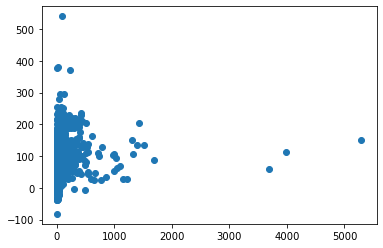

In [21]:
plt.scatter(y_test, predictions)

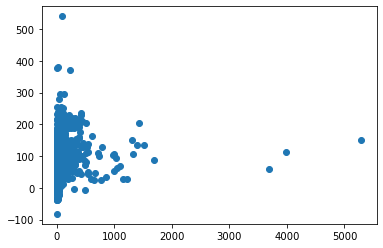

In [23]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression(fit_intercept=True)
model = reg.fit(X_train,y_train)
predict = model.predict(X_test)

plt.scatter(y_test, predict)

In [24]:
from sklearn.metrics import r2_score
print(r2_score(y_test,predict))

0.009781189109185795


In [25]:
from sklearn.model_selection import cross_val_score
# function to get cross validation scores
def get_cv_scores(model):
    scores = cross_val_score(model,
                             X_train,
                             y_train,
                             cv=5,
                             scoring='r2')
    
    print('CV Mean: ', np.mean(scores))
    print('STD: ', np.std(scores))
    print('\n')

In [26]:
get_cv_scores(model)

CV Mean:  0.01430515546480069
STD:  0.005911793957261894




In [28]:
print(reg.intercept_)

84.78518975041015


In [29]:
print(reg.coef_)

[ 16.1832494   -5.74265125  -4.11614996 -18.2416483   -4.16734578
  26.3246758    2.72735897  30.11105166   8.68961995   7.27564912
  -6.37660711  -0.68267479   7.10298717  20.36361761]


In [ ]:
y_pred = lr.predict(X_test)
y_pred.shape

In [ ]:
plt.scatter(y_test, y_pred)
plt.ylabel('Predicted')
plt.xlabel('Y test')

In [ ]:
sns.distplot((y_test-y_pred))

In [ ]:
pd.DataFrame(lr.coef_ , X.columns, columns=['Coeffecient'])

In [ ]:
X_train.shape

In [ ]:
y_train.shape

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))